<a href="https://colab.research.google.com/github/BrotherKim/Colab/blob/main/SEP592/BK_Resnet50_LU_classification_0616.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset download
datasets<br>
    &emsp;&emsp;└── test_set<br>
    &emsp;&emsp;│   &emsp;&emsp;├── cats<br>
    &emsp;&emsp;│   &emsp;&emsp;│   &emsp;&emsp;└── datas...<br>
    &emsp;&emsp;│   &emsp;&emsp;└── dogs<br>
    &emsp;&emsp;│       &emsp;&emsp;&emsp;&emsp;&emsp;└── datas...<br>
    &emsp;&emsp;└── training_set<br>
        &emsp;&emsp;&emsp;&emsp;├── cats<br>
        &emsp;&emsp;&emsp;&emsp;│   &emsp;&emsp;└── datas...<br>
        &emsp;&emsp;&emsp;&emsp;└── dogs<br>
            &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;└── datas...<br>


In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/gdrive/MyDrive/KAIST/kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog
!mkdir datasets
!unzip /content/cat-and-dog.zip -d /content/datasets
!mv /content/datasets/test_set /content/datasets/test_set_legacy
!mv /content/datasets/test_set_legacy/test_set /content/datasets/test_set
!mv /content/datasets/training_set /content/datasets/training_set_legacy
!mv /content/datasets/training_set_legacy/training_set /content/datasets/training_set
!rm -rf /content/datasets/*_set_legacy

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/datasets/training_set/training_set/cats/cat.3704.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3705.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3706.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3707.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3708.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3709.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.371.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3710.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3711.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3712.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3713.jpg  
  inflating: /content/datasets/training_set/training_set/cats/cat.3714.jpg  
  inflating: /content/datasets/training_s

# Data Load

In [ ]:
!ls -l /content/gdrive/MyDrive/KAIST/dataset/test_set

total 8
drwx------ 2 root root 4096 May 30 05:32 lym
drwx------ 2 root root 4096 May 30 05:32 normal


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 위노그라드 알고리즘 설정
os.environ['TF_ENABLE_WINOGRAD_NONFUSED'] = '1'

#rootPath = '/content/datasets'
rootPath = '/content/gdrive/MyDrive/KAIST/SEP592/jpeg_label_dir'

IMAGE_SIZE = 224

imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath),
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    subset='training'
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath),
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    subset='validation'
)

Found 22872 images belonging to 3 classes.
Found 2540 images belonging to 3 classes.


# 모델 구성 및 finetuning

In [ ]:
IMAGE_SIZE = 224
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
NUM_CLASSES = 3
WEIGHT_DIR_PATH = '/content/gdrive/MyDrive/KAIST/SEP592/checkpoints'
WEIGHT_FILE_PATH = 'resnet50_lu_0616.h5'

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

baseModel = ResNet50(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE, pooling='avg', classes=NUM_CLASSES)
#baseModel = ResNet50(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE, classes=NUM_CLASSES)
#baseMode =ResNet50(include_top=True, weights=None, input_shape=INPUT_SHAPE, classes=NUM_CLASSES)

baseModel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
for i, l in enumerate(baseModel.layers):
  print(i, l.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [ ]:
from keras.models import Model
from tensorflow.keras.layers import Flatten, Dropout, Conv2D, MaxPooling2D, Dense, BatchNormalization

#x = baseModel.output
#x = MaxPooling2D(pool_size=(2, 2))(x)
#x = Flatten()(x)
#x = Dropout(0.5)(x)
#x = Dense(512, activation='relu', input_dim=INPUT_SHAPE)(x)
#x = BatchNormalization()(x)
#x = Dense(256, activation ='relu')(x)
#x = BatchNormalization()(x)
#x = Dense(NUM_CLASSES, activation='softmax')(x)

#model = Model(
#    inputs=baseModel.input
#    , outputs=x
#    )

model = Sequential()

model.add(baseModel)
model.add(Dense(NUM_CLASSES, activation='softmax'))
#model.layers[0].trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 6147      
Total params: 23,593,859
Trainable params: 23,540,739
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
NUM_FREEZE = 150

for l in baseModel.layers:
  l.trainable = False

for l in baseModel.layers[NUM_FREEZE:]:
  l.trainable = True


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['acc'],
)

In [ ]:
#epochs = 32
#history = model.fit_generator(
#    trainGen, 
#    epochs=epochs,
#    steps_per_epoch=trainGen.samples / epochs, 
#    validation_data=validationGen,
#    validation_steps=trainGen.samples / epochs,
#)
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

reduce_lr = ReduceLROnPlateau(patience=8,verbose=1)
early_stop = EarlyStopping(patience=10,verbose=2,monitor='loss')

epochs = 32
history = model.fit_generator(
    trainGen,  
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=validationGen.samples / epochs,
    callbacks=[reduce_lr,early_stop],
    workers=1000,
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/32
714/714 [==============================] - 217s 295ms/step - loss: 0.5752 - acc: 0.7203 - val_loss: 22.8337 - val_acc: 0.3988
Epoch 2/32
714/714 [==============================] - 214s 295ms/step - loss: 0.5087 - acc: 0.7597 - val_loss: 4.4970 - val_acc: 0.3988
Epoch 3/32
714/714 [==============================] - 213s 293ms/step - loss: 0.4941 - acc: 0.7645 - val_loss: 7.1925 - val_acc: 0.3988
Epoch 4/32
714/714 [==============================] - 214s 295ms/step - loss: 0.4843 - acc: 0.7718 - val_loss: 0.6765 - val_acc: 0.6012
Epoch 5/32
714/714 [==============================] - 214s 294ms/step - loss: 0.5132 - acc: 0.7593 - val_loss: 0.6787 - val_acc: 0.6012
Epoch 6/32
714/714 [==============================] - 215s 296ms/step - loss: 0.5021 - acc: 0.7615 - val_loss: 1.1604 - val_acc: 0.4476
Epoch 7/32
714/714 [==============================] - 214s 295ms/step - loss: 0.4917 - acc: 0.7680 - val_loss: 8.8116 - val_acc: 0.3988
Epoch 8/32
714/714 [===========================

In [ ]:
#model.save_weights("/content/gdrive/MyDrive/KAIST/SEP592/checkpoints/resnet50_brca_ckpt")
!mkdir -p WEIGHT_DIR_PATH
WEIGHT_FILE_PATH = '210616_Resnet50_lu_freeze150_32.h5'

model.save_weights('%s/%s' % (WEIGHT_DIR_PATH, WEIGHT_FILE_PATH))

# `assert_consumed` can be used as validation that all variable values have been
# restored from the checkpoint. See `tf.train.Checkpoint.restore` for other
# methods in the Status object.
#load_status.assert_consumed()

#학습 결과 시각화

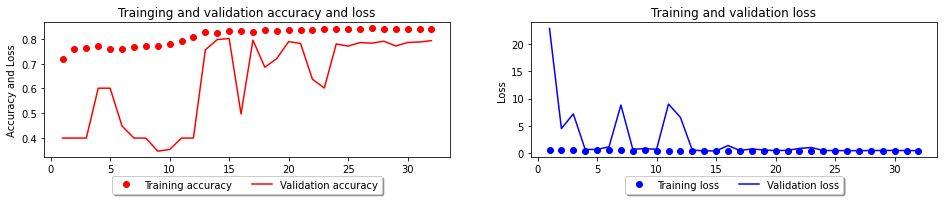

In [ ]:
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 1))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy and loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()
show_graph(history.history)


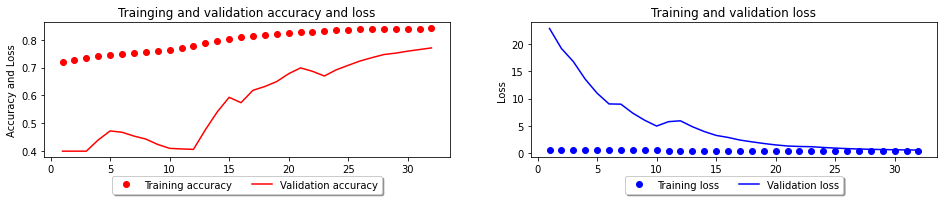

In [ ]:
def smooth_curve(points, factor=.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_data = {}
for key, val in history.history.items():
    smooth_data[key] = smooth_curve(val)
show_graph(smooth_data)


#모델 평가

In [ ]:
#!ls -l /content/gdrive/MyDrive/KAIST/SEP592/checkpoints | grep resnet50 | grep brca

In [ ]:
#load_status = model.load_weights('%s/%s' % (WEIGHT_DIR_PATH, '210616_Resnet50_lu_freeze150_32.h5'))

In [ ]:
#model.compile(
#    optimizer='adam',
#    loss='binary_crossentropy', 
#    metrics=['acc'],
#)

In [ ]:
testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = testGenerator.flow_from_directory(
    os.path.join(rootPath),
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle = False,  
)


Found 77449 images belonging to 3 classes.


In [ ]:
#model.evaluate_generator(testGen)
testevaluation = model.evaluate_generator(testGen, verbose=1, steps=testGen.samples//32, workers = 1000)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


2420/2420 [==============================] - 1147s 474ms/step - loss: 109.2668 - acc: 0.2133


In [ ]:
testevaluation

[109.26677703857422, 0.2132747918367386]

In [ ]:
#Predicting the classes of images
testprediction = model.predict_generator(testGen, verbose=1, steps=testGen.samples//32, workers=1000)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


2420/2420 [==============================] - 164s 67ms/step


In [ ]:
print(testGen.class_indices)
print(testprediction)

{'Solid_Tissue_Normal': 0, 'TCGA-LUAD': 1, 'TCGA-LUSC': 2}
[[1.0000000e+00 0.0000000e+00 9.0178872e-32]
 [9.9911481e-01 3.7176308e-12 8.8512863e-04]
 [1.0000000e+00 0.0000000e+00 1.5395245e-21]
 ...
 [1.0000000e+00 2.3231062e-26 2.1449106e-11]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [ ]:
testGen.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
testprediction[:,0]

array([1.       , 0.9991148, 1.       , ..., 1.       , 1.       ,
       1.       ], dtype=float32)

In [ ]:
testprediction[:,1]

array([0.0000000e+00, 3.7176308e-12, 0.0000000e+00, ..., 2.3231062e-26,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [ ]:
testprediction[:,2]

array([9.0178872e-32, 8.8512863e-04, 1.5395245e-21, ..., 2.1449106e-11,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [ ]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

nn_fpr, nn_tpr, nn_th = roc_curve(testGen.classes, testprediction[:,0])
auc_pred = auc(nn_fpr, nn_tpr)

plt.figure()
plt.plot(nn_fpr, nn_tpr, label='ROC curve of label "Solid_Tissue_Normal"(area = %0.2f)' % auc_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


ValueError: ignored

In [ ]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

nn_fpr, nn_tpr, nn_th = roc_curve(testGen.classes, testprediction[:,1])
auc_pred = auc(nn_fpr, nn_tpr)

plt.figure()
plt.plot(nn_fpr, nn_tpr, label='ROC curve of label "LUAD"(area = %0.2f)' % auc_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

nn_fpr, nn_tpr, nn_th = roc_curve(testGen.classes, testprediction[:,2])
auc_pred = auc(nn_fpr, nn_tpr)

plt.figure()
plt.plot(nn_fpr, nn_tpr, label='ROC curve of label "LUSC"(area = %0.2f)' % auc_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
len(testGen.labels)
#for i in range(100):

# answer가 0인데 predict가 1이면 failCntArr[0]++
failCntArr = [0, 0, 0]
allCntArr = [0, 0, 0]
for i in range(len(testprediction)):
  prdIdx = 1 if testprediction[i][0] < testprediction[i][1] else 0
  ansIdx = testGen.labels[i]
  allCntArr[ansIdx] += 1

  if prdIdx == ansIdx : continue
  #print('[FAIL] predict[%d], answer[%d]' % (prdIdx, ansIdx))
  failCntArr[ansIdx] += 1

print('Pass cnt : lym[%d/%d], normal[%d/%d]' % (failCntArr[0], allCntArr[0], failCntArr[1], allCntArr[1]))

Pass cnt : lym[0/15277], normal[52037/52037]


# 추가학습

In [ ]:
#epochs = 32
#history = model.fit_generator(
#    trainGen, 
#    epochs=epochs,
#    steps_per_epoch=trainGen.samples / epochs, 
#    validation_data=validationGen,
#    validation_steps=trainGen.samples / epochs,
#)
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

reduce_lr = ReduceLROnPlateau(patience=8,verbose=1)
early_stop = EarlyStopping(patience=10,verbose=2,monitor='loss')

epochs = 32
history = model.fit_generator(
    trainGen,  
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=validationGen.samples / epochs,
    callbacks=[reduce_lr,early_stop],
    workers=1000,
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/32
714/714 [==============================] - 217s 299ms/step - loss: 0.3676 - acc: 0.8424 - val_loss: 0.4724 - val_acc: 0.7898
Epoch 2/32
714/714 [==============================] - 216s 298ms/step - loss: 0.3613 - acc: 0.8477 - val_loss: 0.4747 - val_acc: 0.7878
Epoch 3/32
714/714 [==============================] - 216s 297ms/step - loss: 0.3636 - acc: 0.8433 - val_loss: 0.4609 - val_acc: 0.7894
Epoch 4/32
714/714 [==============================] - 216s 297ms/step - loss: 0.3658 - acc: 0.8416 - val_loss: 0.4623 - val_acc: 0.7921
Epoch 5/32
714/714 [==============================] - 215s 296ms/step - loss: 0.3658 - acc: 0.8434 - val_loss: 0.4625 - val_acc: 0.7819
Epoch 6/32
714/714 [==============================] - 216s 297ms/step - loss: 0.3658 - acc: 0.8429 - val_loss: 0.4685 - val_acc: 0.7917
Epoch 7/32
714/714 [==============================] - 215s 296ms/step - loss: 0.3679 - acc: 0.8405 - val_loss: 0.4667 - val_acc: 0.7925
Epoch 8/32
714/714 [============================

In [ ]:
#model.save_weights("/content/gdrive/MyDrive/KAIST/SEP592/checkpoints/resnet50_brca_ckpt")
!mkdir -p WEIGHT_DIR_PATH
WEIGHT_FILE_PATH = '210616_Resnet50_lu_freeze150_64.h5'

model.save_weights('%s/%s' % (WEIGHT_DIR_PATH, WEIGHT_FILE_PATH))

# `assert_consumed` can be used as validation that all variable values have been
# restored from the checkpoint. See `tf.train.Checkpoint.restore` for other
# methods in the Status object.
#load_status.assert_consumed()

#학습 결과 시각화

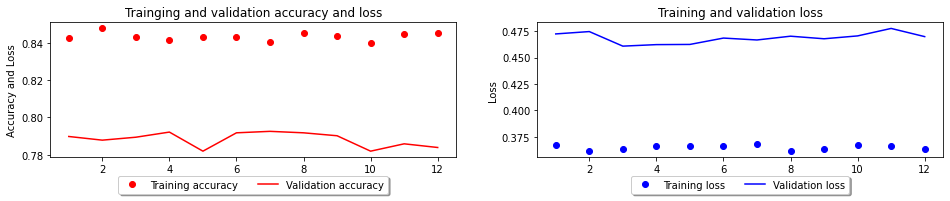

In [ ]:
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 1))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy and loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()
show_graph(history.history)


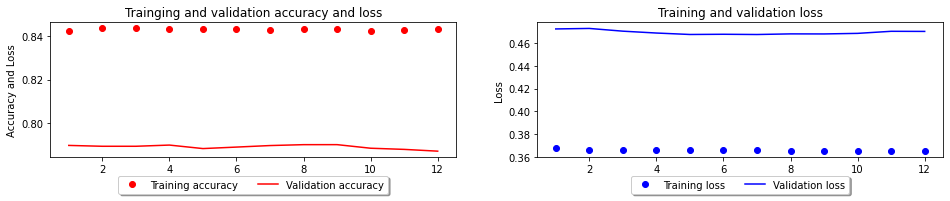

In [ ]:
def smooth_curve(points, factor=.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_data = {}
for key, val in history.history.items():
    smooth_data[key] = smooth_curve(val)
show_graph(smooth_data)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#모델 평가

In [ ]:
#!ls -l /content/gdrive/MyDrive/KAIST/SEP592/checkpoints | grep resnet50 | grep brca

In [ ]:
#load_status = model.load_weights('%s/%s' % (WEIGHT_DIR_PATH, '210616_Resnet50_lu_freeze150_32.h5'))

In [ ]:
#model.compile(
#    optimizer='adam',
#    loss='binary_crossentropy', 
#    metrics=['acc'],
#)

In [ ]:
#testGenerator = ImageDataGenerator(
#    rescale=1./255
#)

#testGen = testGenerator.flow_from_directory(
#    os.path.join(rootPath),
#    target_size=(IMAGE_SIZE, IMAGE_SIZE),
#    shuffle = False,  
#)


In [ ]:
#model.evaluate_generator(testGen)
testevaluation = model.evaluate_generator(testGen, verbose=1, steps=testGen.samples//32, workers = 1000)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


2420/2420 [==============================] - 170s 69ms/step - loss: 115.5545 - acc: 0.2133


In [ ]:
testevaluation

[115.55451965332031, 0.2133135348558426]

In [ ]:
#Predicting the classes of images
testprediction = model.predict_generator(testGen, verbose=1, steps=testGen.samples//32, workers=1000)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


2420/2420 [==============================] - 169s 69ms/step


In [ ]:
print(testGen.class_indices)
print(testprediction)

{'Solid_Tissue_Normal': 0, 'TCGA-LUAD': 1, 'TCGA-LUSC': 2}
[[1.0000000e+00 0.0000000e+00 3.8275558e-33]
 [9.9927241e-01 1.7246223e-12 7.2759960e-04]
 [1.0000000e+00 0.0000000e+00 1.4699262e-22]
 ...
 [1.0000000e+00 5.1056403e-27 1.3644183e-11]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [ ]:
testGen.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
testprediction[:,0]

array([1.       , 0.9992724, 1.       , ..., 1.       , 1.       ,
       1.       ], dtype=float32)

In [ ]:
testprediction[:,1]

array([0.0000000e+00, 1.7246223e-12, 0.0000000e+00, ..., 5.1056403e-27,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [ ]:
testprediction[:,2]

array([3.8275558e-33, 7.2759960e-04, 1.4699262e-22, ..., 1.3644183e-11,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [ ]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

nn_fpr, nn_tpr, nn_th = roc_curve(testGen.classes, testprediction[:,0])
auc_pred = auc(nn_fpr, nn_tpr)

plt.figure()
plt.plot(nn_fpr, nn_tpr, label='ROC curve of label "Solid_Tissue_Normal"(area = %0.2f)' % auc_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


ValueError: ignored

In [ ]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

nn_fpr, nn_tpr, nn_th = roc_curve(testGen.classes, testprediction[:,1])
auc_pred = auc(nn_fpr, nn_tpr)

plt.figure()
plt.plot(nn_fpr, nn_tpr, label='ROC curve of label "LUAD"(area = %0.2f)' % auc_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

nn_fpr, nn_tpr, nn_th = roc_curve(testGen.classes, testprediction[:,2])
auc_pred = auc(nn_fpr, nn_tpr)

plt.figure()
plt.plot(nn_fpr, nn_tpr, label='ROC curve of label "LUSC"(area = %0.2f)' % auc_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
len(testGen.labels)
#for i in range(100):

# answer가 0인데 predict가 1이면 failCntArr[0]++
failCntArr = [0, 0, 0]
allCntArr = [0, 0, 0]
for i in range(len(testprediction)):
  prdIdx = 1 if testprediction[i][0] < testprediction[i][1] else 0
  ansIdx = testGen.labels[i]
  allCntArr[ansIdx] += 1

  if prdIdx == ansIdx : continue
  #print('[FAIL] predict[%d], answer[%d]' % (prdIdx, ansIdx))
  failCntArr[ansIdx] += 1

print('Pass cnt : lym[%d/%d], normal[%d/%d]' % (failCntArr[0], allCntArr[0], failCntArr[1], allCntArr[1]))